# Imports

In [1]:
import tensorflow as tf
import os
from os.path import exists
from tensorflow.python.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import random

In [2]:
# set working dir to root, to access saved models and data
os.chdir('C:/Users/zacha/Documents/GitHub/plymouth-university-proj518')
print(os.getcwd())

C:\Users\zacha\Documents\GitHub\plymouth-university-proj518


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [27]:
def mirror(model, df, yscaler):
    pred = model.predict(df)    # batch predict using model

    pred = yscaler.inverse_transform(pred)  # transform back to original scale

    # join prediction with original dataframe
    df['Chi'] = pred

    return df

# Wind

In [26]:
# load wind model
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'wind_regression_model.h5'
model_path = os.path.join(save_dir, model_name)

if exists(model_path):  # load model if exists
    print(f"LOADING MODEL: {model_path}")
    wind_model = load_model(model_path)
else:   # else generate new model
    raise Exception("NO MODEL FOUND")

wind_model.summary()

LOADING MODEL: c:\Users\zacha\Documents\GitHub\plymouth-university-proj518\saved_models\wind_regression_model.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________

In [27]:
# load wind model input scaler
save_dir = os.path.join(os.getcwd(), 'saved_models')
scaler_name = 'wind_regression_scaler'
scaler_path = os.path.join(save_dir, scaler_name)

yscaler = joblib.load(scaler_path)

In [28]:
file = 'data/jan2020.nc.csv'
df = pd.read_csv(file, sep=',')

In [10]:
# predict values at same datapoints as csv
wind_predicted = mirror(wind_model, df, yscaler, columns=['Lon', 'Lat', 'Chi'])

NameError: name 'wind_model' is not defined

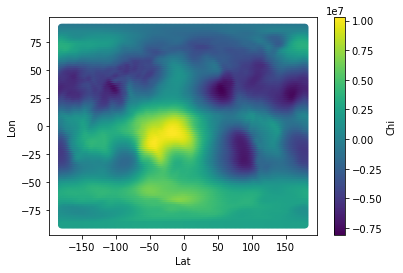

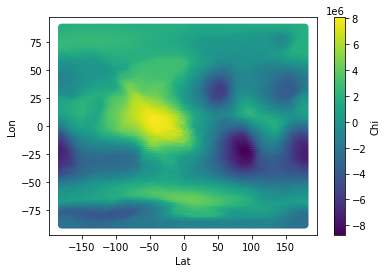

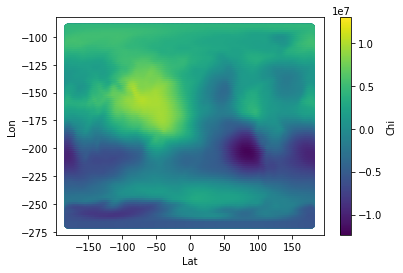

In [30]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lpn'], df['Lat'], c=df['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(wind_predicted['Lon'], wind_predicted['Lat'], c=wind_predicted['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

file = 'data/2020 velocity potential .995 sigma.csv'
df = pd.read_csv(file, sep=',')

df[['Lon']] = df[['Lon']]-180.0
x = df[['Lat','Lat']]
y = df[['Chi']]

# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lon'], df['Lat'], c=df['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

# Wind-Time

In [4]:
# load wind model
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'wind_time_regression_model_25082022164000.h5'
model_path = os.path.join(save_dir, model_name)

if exists(model_path):  # load model if exists
    print(f"LOADING MODEL: {model_path}")
    wind_time_model = load_model(model_path)
else:   # else generate new model
    raise Exception("NO MODEL FOUND")

wind_time_model.summary()

LOADING MODEL: C:\Users\zacha\Documents\GitHub\plymouth-university-proj518\saved_models\wind_time_regression_model_25082022164000.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)            

In [7]:
# load wind model input scaler
save_dir = os.path.join(os.getcwd(), 'saved_models')
scaler_name = 'wind_time_scaler_25082022164000'
scaler_path = os.path.join(save_dir, scaler_name)

yscaler = joblib.load(scaler_path)

c:\Users\zacha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
file = 'data/NCEP daily velocity potential reanalysis.csv'
df = pd.read_csv(file, sep=',')
print(df['Day'].min(), df['Day'].max())

# randomly select day to sample
day = random.randint(df['Day'].min(), df['Day'].max())

# filter dataframe to only include day of interest
df_day = df[df['Day'] == day]

# drop 'Chi' from dataframe
test_df = df_day.drop(columns=['Chi'])


0 228


In [36]:
# predict values at same datapoints as csv
wind_time_predicted = mirror(wind_time_model, test_df, yscaler)

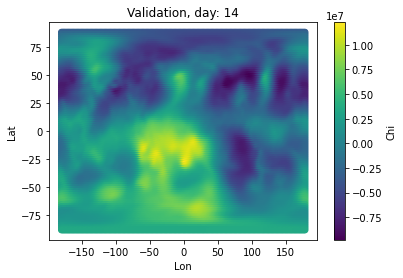

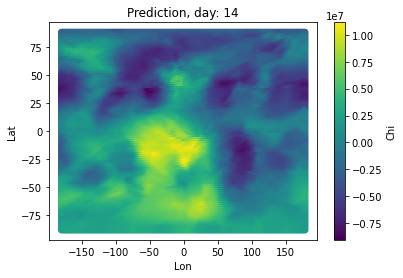

In [37]:
# plot known data
fig = plt.figure()
ax = fig.add_subplot(111)
title = f'Validation, day: {day}'
ax.title.set_text(title)
map = ax.scatter(df_day['Lon'], df_day['Lat'], c=df_day['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

# plot predicted values at day of interest
fig = plt.figure()
ax = fig.add_subplot(111)
title = f'Prediction, day: {day}'
ax.title.set_text(title)
map = ax.scatter(wind_time_predicted['Lon'], wind_time_predicted['Lat'], c=wind_time_predicted['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()